### Numpy和原生Python用于数组计算的性能对比

需求：
* 实现两个数组的加法
* 数组A是1~N数字的平方
* 数组B是1~N数字的立方

对比使用Numpy和原生Python的性能对比

### 引入Numpy的包

In [2]:
import numpy as np

In [3]:
np.__version__

'1.17.1'

### 使用Python原生语法实现对比

In [5]:
def python_sum(n):
    """ Python实现数组的加法
    @param n：数组的长度
    """
    a = [i**2 for i in range(n)]
    b = [i**3 for i in range(n)]
    c = []
    for i in range(n):
        c.append(a[i] + b[i])
    return c

In [6]:
# 测试一下
python_sum(10)

[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

### 使用Numpy实现

In [7]:
def numpy_sum(n):
    """ numpy实现数组的加法
    @param n：数组的长度
    """
    a = np.arange(n) ** 2
    b = np.arange(n) ** 3
    return a+b

In [8]:
# 测试一下
numpy_sum(10)

array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810], dtype=int32)

### 性能对比：执行1000次

In [12]:
%timeit python_sum(1000)

682 µs ± 3.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
%timeit numpy_sum(1000)

6.75 µs ± 36.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 性能对比：执行10W次

In [14]:
%timeit python_sum(10 * 10000)

73.5 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
%timeit numpy_sum(10 * 10000)

313 µs ± 1.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 性能对比：执行1000W次

In [16]:
%timeit python_sum(1000 * 10000)

8.05 s ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit numpy_sum(1000 * 10000)

90.5 ms ± 2.21 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 绘制性能对比图

In [18]:
pytimes = [682, 73.5*1000, 8.05*1000*1000]
nptimes = [6.75, 313, 90.5*1000]

In [24]:
import pandas as pd

In [25]:
df = pd.DataFrame({
    "pytimes":pytimes,
    "nptimes":nptimes,
})

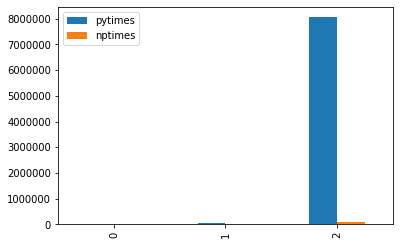

In [30]:
df.plot.bar()